In [1]:
#header standarization
def header_data_std(dataframe): 
    cols = []
    for i in range (len(dataframe.columns)):
        cols.append(dataframe.columns[i].lower().replace(" ","_"))
    dataframe.columns = cols
    return(dataframe)

#null values info
def null_find(dataframe):
    null_df = pd.DataFrame(round(dataframe.isna().sum()/len(dataframe),4)*100)
    null_df = null_df.reset_index()
    null_df.columns = ['header','percentage_nulls']
    return(null_df)
           
#check datatypes
def check_dtypes(dataframe):
    test =dataframe.dtypes
    x=0
    for i in range (len(dataframe.columns)):
        print("COL NAME: ",dataframe.columns[i])
        print("  TYPE: ",test[x])
        print("  % OF UNIQUE VALUES: ", (len(pd.unique(dataframe[dataframe.columns[i]]))/len(dataframe[dataframe.columns[i]]))*100 )
        print("  Values: ",pd.unique(dataframe[dataframe.columns[i]]))
        print("  SAMPLE: ",dataframe.iloc[0][dataframe.columns[i]])
        print()
        x+=1
    return()

1. Import the necessary libraries.


In [2]:
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df`.


In [3]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') 

3. First look at its main features (`head`, `shape`, `info`).


In [4]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the _PE8_ (snake case).

In [6]:
customer_df = header_data_std(customer_df)

In [7]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


5. Change effective to date column to datetime format.


In [8]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

6. Check `NaN` values per column.


In [9]:
null_find(customer_df)

,header,percentage_nulls
0,customer,0.0
1,state,0.0
2,customer_lifetime_value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective_to_date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


7. Define a function that differentiates between continuous and discrete variables. **Hint**: A number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.

In [10]:
#split data in continous and discrete + categorical and drop categoricals with excesive values
def split_data(dataframe):
    time = dataframe.select_dtypes(include = np.datetime64)
    numerical = dataframe.select_dtypes(include = np.number)
    categorical = dataframe.select_dtypes(include = object)
    categorical2= pd.DataFrame() 
    numerical2 = pd.DataFrame()

    for i in range (len(numerical.columns)):
        if (len(pd.unique(numerical[numerical.columns[i]]))/len(numerical)*100) < 1 :
            categorical.loc[:,numerical.columns[i]]= numerical[numerical.columns[i]].astype(object)
            #numerical = numerical.drop(numerical.columns[i], axis=1)
        else:
            numerical2.loc[:,numerical.columns[i]] = numerical[numerical.columns[i]]
    #for i in range (len(categorical.columns)):
    #    if (len(pd.unique(categorical[categorical.columns[i]]))/len(categorical)*100) < 1 :
    #        categorical2.loc[:,categorical.columns[i]]= categorical[categorical.columns[i]]
    print(time)
    print(categorical.columns)
    print(numerical2.columns)
    return(pd.concat([categorical,time], axis =1),numerical2)

In [11]:
discrete,continuous = split_data(customer_df)

     effective_to_date
0           2011-02-24
1           2011-01-31
2           2011-02-19
3           2011-01-20
4           2011-02-03
...                ...
9129        2011-02-10
9130        2011-02-12
9131        2011-02-06
9132        2011-02-03
9133        2011-02-14

[9134 rows x 1 columns]
Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'months_since_last_claim',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')


C:\Users\Kyre\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


8.For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [12]:
discrete.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,number_of_open_complaints,number_of_policies,effective_to_date
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,0,1,2011-02-24
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,0,8,2011-01-31
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,18,0,2,2011-02-19
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,18,0,7,2011-01-20
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,12,0,1,2011-02-03


In [13]:
discrete['renew_offer_type'].unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [14]:
discrete.dtypes

customer                             object
state                                object
response                             object
coverage                             object
education                            object
employmentstatus                     object
gender                               object
location_code                        object
marital_status                       object
policy_type                          object
policy                               object
renew_offer_type                     object
sales_channel                        object
vehicle_class                        object
vehicle_size                         object
months_since_last_claim              object
number_of_open_complaints            object
number_of_policies                   object
effective_to_date            datetime64[ns]
dtype: object

#I´m not doing anything with the categoricals

9.Get categorical features.

discrete = pd.get_dummies(discrete, drop_first=True)
discrete

10.What should we do with the customer_id column?
Already dropped in step 7

In [15]:
discrete = discrete.drop('customer', axis=1)

In [16]:
continuous

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [17]:
data =pd.concat([discrete,continuous], axis =1)

# Lab | Feature extraction

In [18]:
data.shape

(9134, 23)


   1. Open the categoricals variable we created before.


In [19]:
categoricals = data.select_dtypes(object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,number_of_open_complaints,number_of_policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,18,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,18,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,12,0,1


2.Plot all the categorical variables with the proper plot. What can you see?

In [20]:
check_dtypes(categoricals)

COL NAME:  state
  TYPE:  object
  % OF UNIQUE VALUES:  0.054740529888329316
  Values:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
  SAMPLE:  Washington

COL NAME:  response
  TYPE:  object
  % OF UNIQUE VALUES:  0.02189621195533173
  Values:  ['No' 'Yes']
  SAMPLE:  No

COL NAME:  coverage
  TYPE:  object
  % OF UNIQUE VALUES:  0.032844317932997594
  Values:  ['Basic' 'Extended' 'Premium']
  SAMPLE:  Basic

COL NAME:  education
  TYPE:  object
  % OF UNIQUE VALUES:  0.054740529888329316
  Values:  ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
  SAMPLE:  Bachelor

COL NAME:  employmentstatus
  TYPE:  object
  % OF UNIQUE VALUES:  0.054740529888329316
  Values:  ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
  SAMPLE:  Employed

COL NAME:  gender
  TYPE:  object
  % OF UNIQUE VALUES:  0.02189621195533173
  Values:  ['F' 'M']
  SAMPLE:  F

COL NAME:  location_code
  TYPE:  object
  % OF UNIQUE VALUES:  0.032844317932997594
  Values:  ['Subur

()

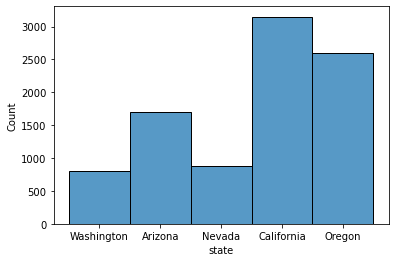

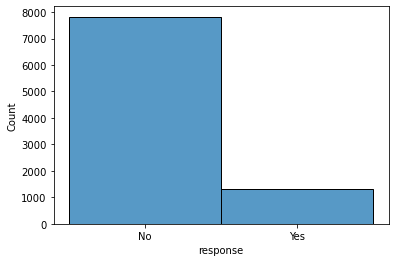

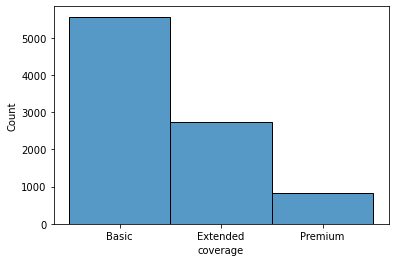

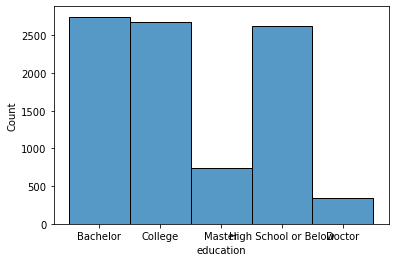

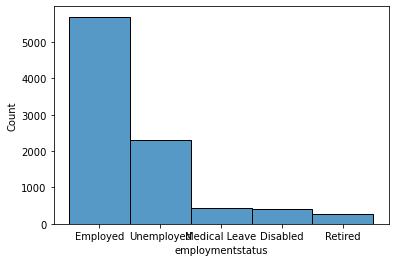

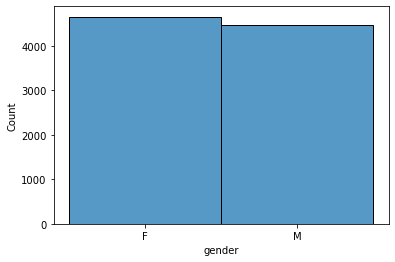

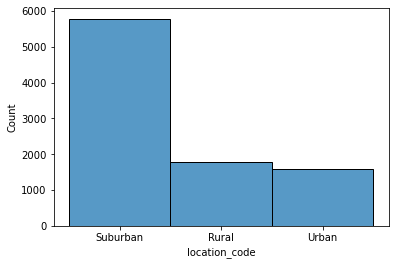

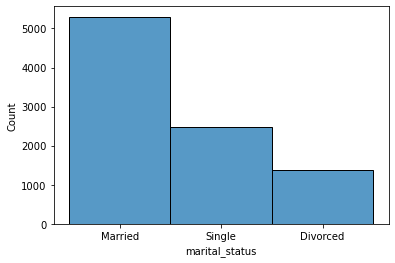

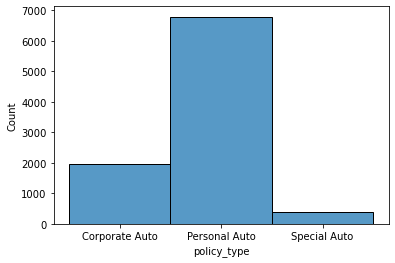

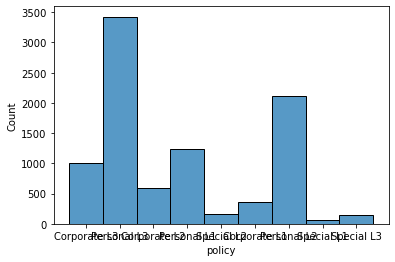

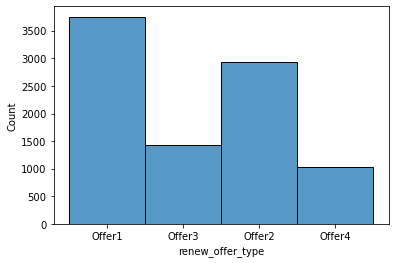

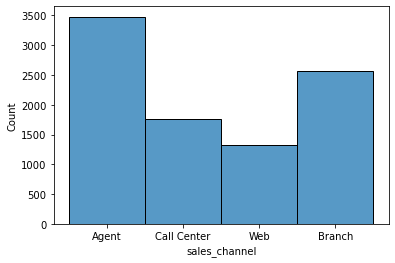

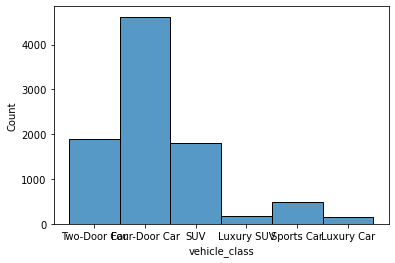

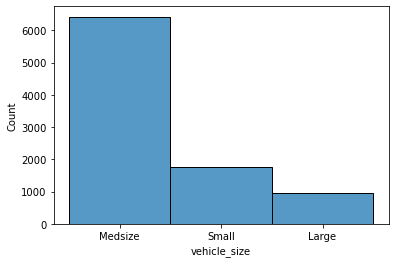

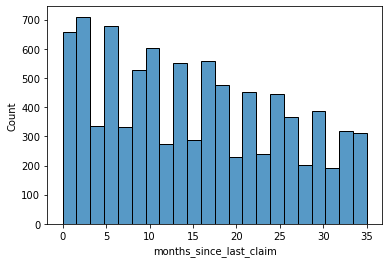

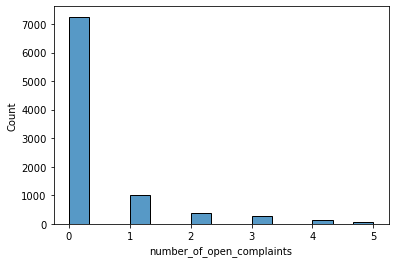

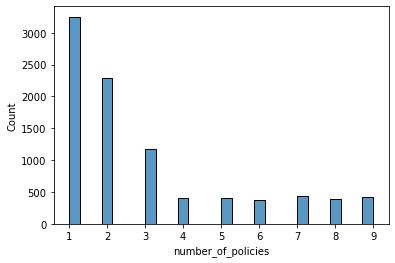

<Figure size 432x288 with 0 Axes>

In [21]:

for i in categoricals.columns:
    sns.histplot(categoricals[i])
    plt.figure(i)

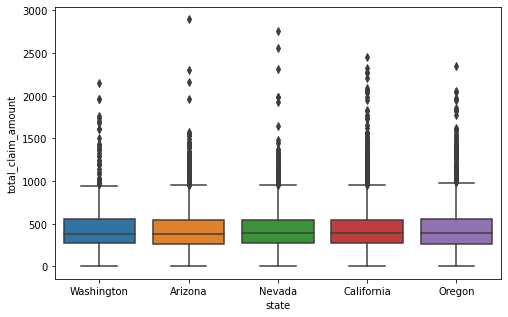

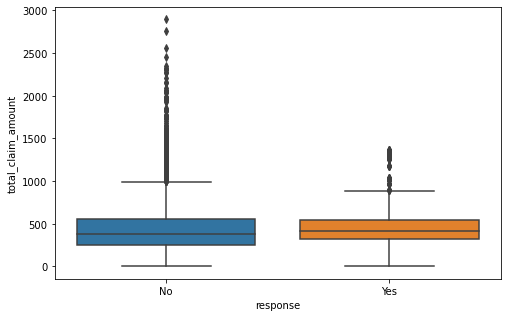

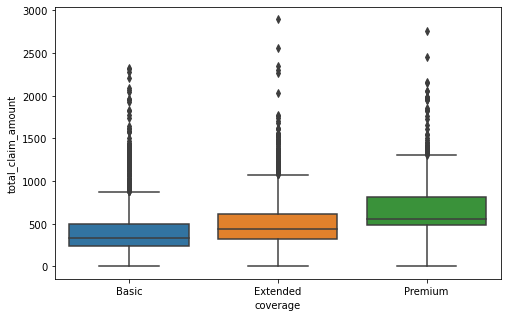

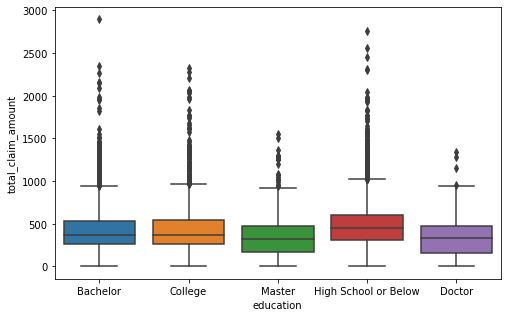

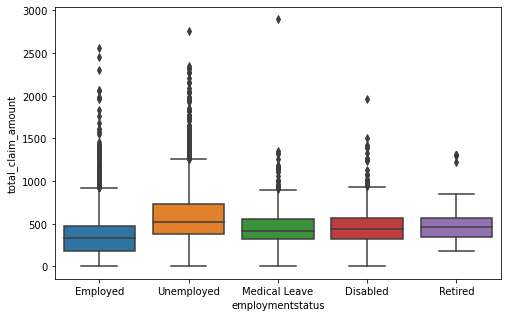

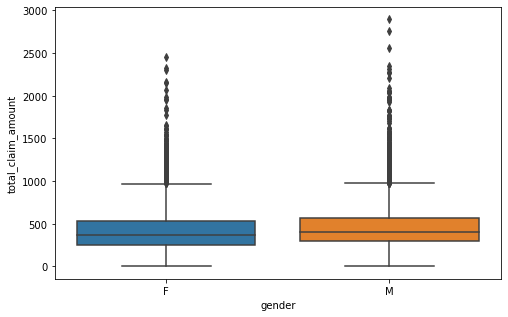

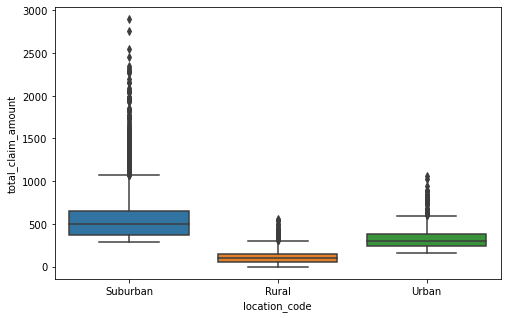

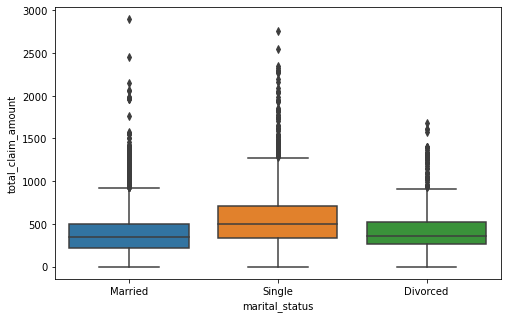

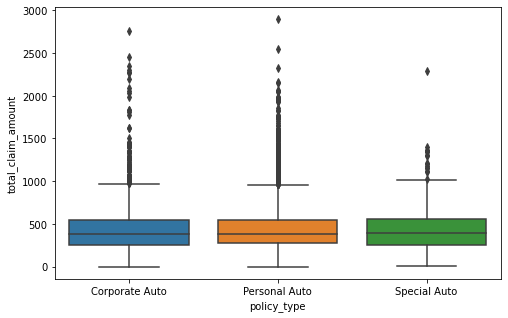

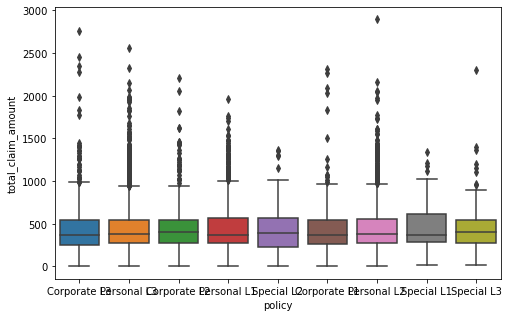

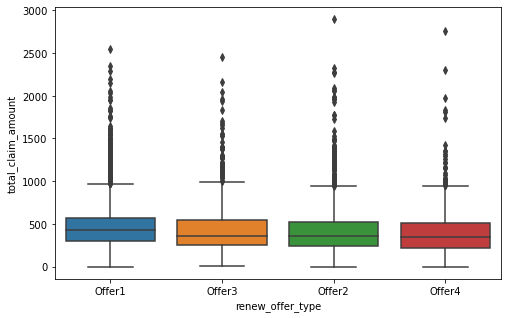

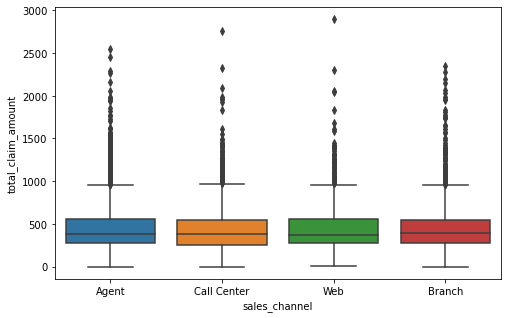

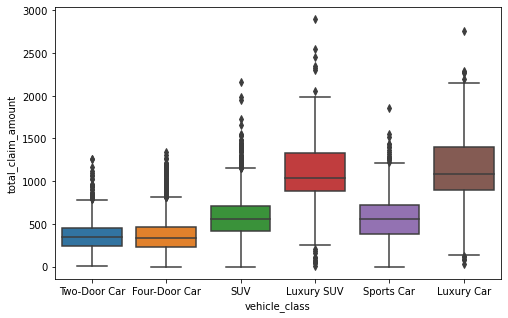

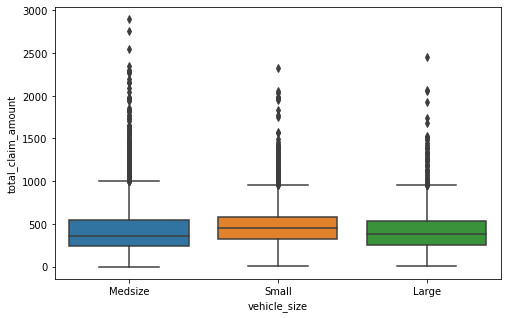

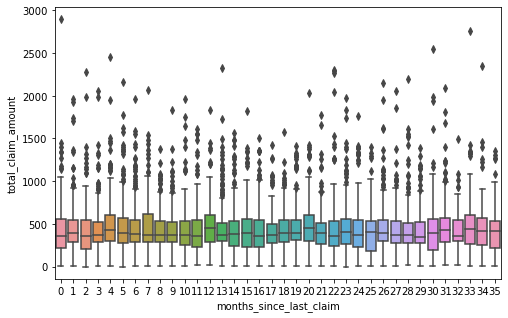

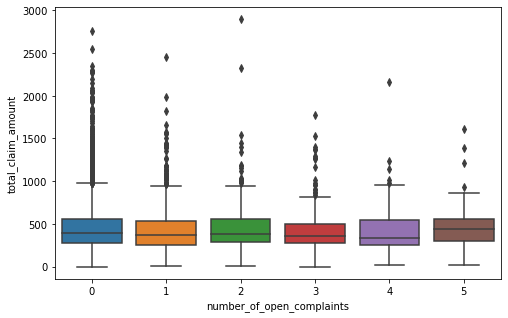

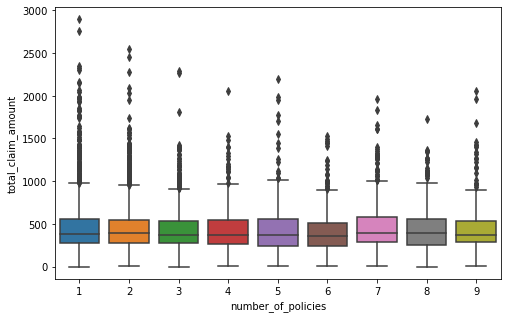

In [22]:
for col in categoricals:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=categoricals[col], y=data['total_claim_amount'])
    plt.show()

gender is useless and policy is contained in policy_type


In [23]:
data = data.drop(['gender','policy'], axis = 1)

In [24]:
data.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'location_code', 'marital_status', 'policy_type', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'effective_to_date', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'months_since_policy_inception',
       'total_claim_amount'],
      dtype='object')

C:\Users\Kyre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

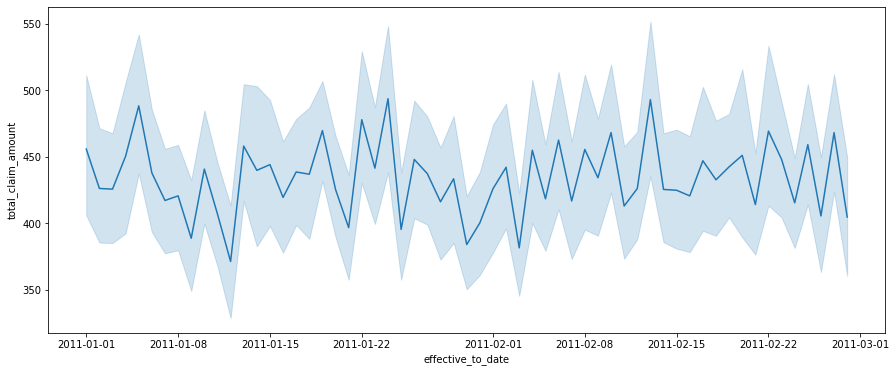

In [25]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data['effective_to_date'], data['total_claim_amount'] )